<a href="https://colab.research.google.com/github/BrunoSorrilha/Python/blob/main/2_ExemploAnalisedasInscricoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An√°lise de Dados Simples - Inscri√ß√µes do Curso

### Ap√≥s a Aula introdut√≥ria vamos ver como colher algumas informa√ß√µes Simples Usando Python

In [ ]:
import pandas as pd #Biblioteca respons√°vel para fazer a leitura e impress√£o de bases de dados

### Veja neste link como armazenar uma planilha excel no Github para usar como base de dados no COLAB

In [ ]:
url = 'https://github.com/profcintiapinho/laboratorio_ia/blob/main/respostasalunos.xlsx?raw=true' #pega o caminho do arquivo excel no github
planilha = "respostas" #identifica a planilha que est√° os dados
base = pd.read_excel(url,planilha) #pega o caminho e a planilha exata e armazena na vari√°vel

In [ ]:
base

Turma interesse computador  \
0       Novo Tec - Administra√ß√£o(Tarde)     Noite        Sim   
1                 Contabilidade - Noite     Tarde        Sim   
2                 Contabilidade - Noite     Tarde        Sim   
3   Novo Tec - Recursos Humanos (Manh√£)     Noite        Sim   
4                 Contabilidade - Noite     Tarde        Sim   
..                                  ...       ...        ...   
56                    Logistica - Noite     Tarde        n√£o   
57                    Logistica - Noite     Tarde        n√£o   
58       Novo Tec - Inform√°tica (Manh√£)     Tarde        Sim   
59       Novo Tec - Inform√°tica (Manh√£)     Noite        Sim   
60       Novo Tec - Inform√°tica (Manh√£)     Noite        Sim   

                                            motivacao  
0   Quero estar mais liga e aprender muito mais  s...  
1   conseguir automatizar alguns processos no meu ...  
2   Obter um pouco de conhecimento nessa √°rea, a q...  
3   Porque o python √© uma linguagens de programa√ß√£...  
4                 quero aprimorar meus conhecimentos   
..                                                ...  
56  Ter um curso extracurricular pra melhorar meu ...  
57  Ter um curso extracurricular pra melhorar meu ...  
58  Busca por conhecimentos que possam agregar na ...  
59  Ampliar meus conhecimentos na √°rea de inform√°tica  
60  Adquirir mais conhecimentos na √°rea. E ter um ...  

[61 rows x 4 columns]

In [ ]:
import matplotlib.pyplot as plt #biblioteca para gerar gr√°ficos
import seaborn as sns #biblioteca para visualizar gr√°ficos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


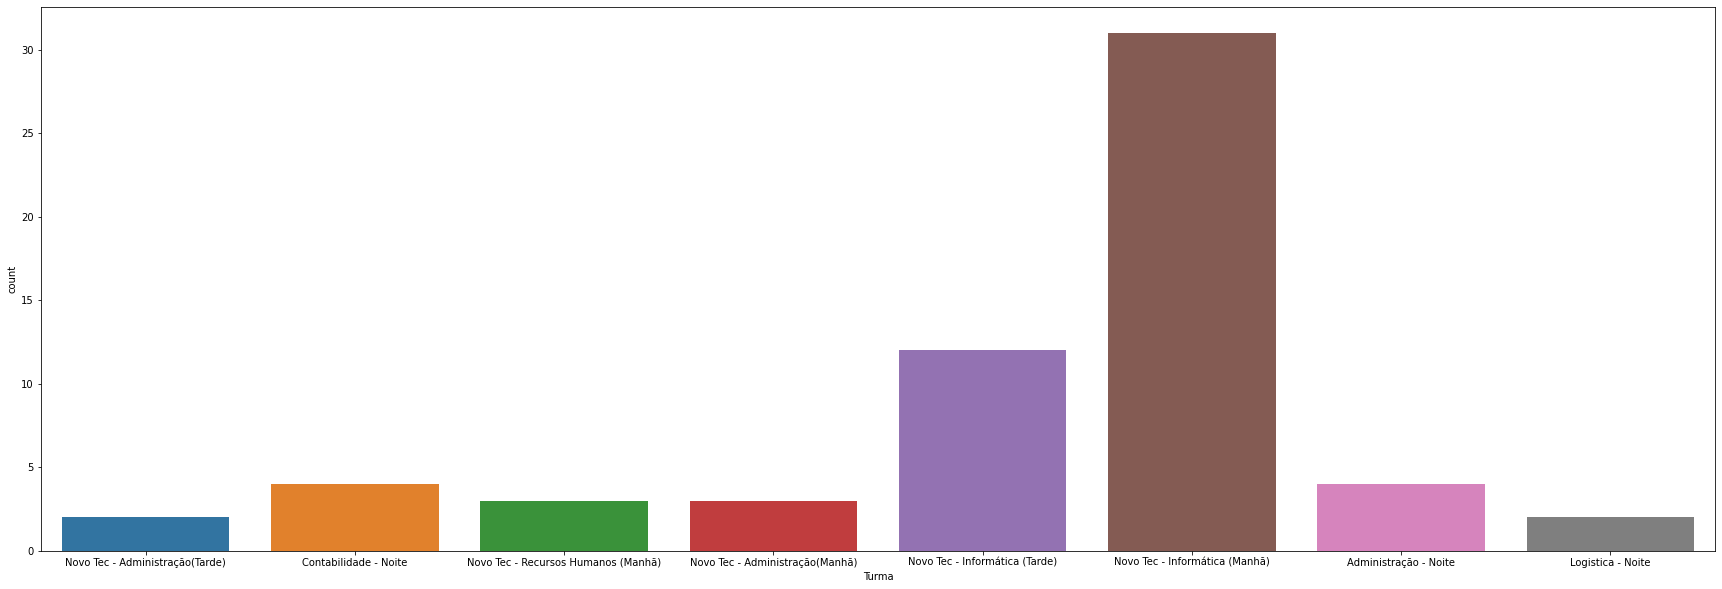

In [ ]:
plt.subplots(figsize=(30, 10))
sns.countplot(base.Turma);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Alunos possuem computadores?')

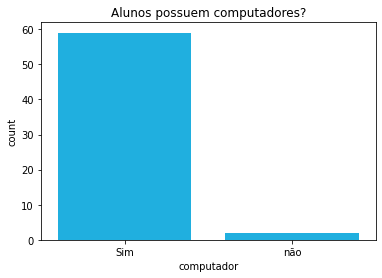

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(base['computador'], color='#00BFFF');
plt.title('Alunos possuem computadores?')

In [ ]:
base['interesse'].value_counts()

Tarde    31
Noite    30
Name: interesse, dtype: int64

In [ ]:
tarde = base.interesse.value_counts()['Tarde']
noite = base.interesse.value_counts()['Noite']

In [ ]:
x = ["Tarde", "Noite"]
y = [tarde, noite]

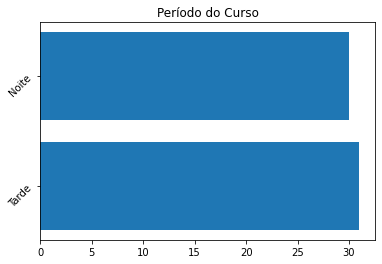

In [ ]:
plt.barh(x, y)
plt.yticks(rotation=45)
plt.title('Per√≠odo do Curso')
plt.show()

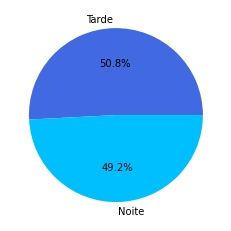

In [ ]:
cores = ['#4169E1','#00BFFF','#00008B']
plt.pie(y, labels=x, autopct='%1.1f%%', colors = cores)
plt.show()

In [ ]:
import spacy
import re

In [ ]:
!python -m spacy download pt_core_news_sm

2023-09-01 11:02:29.317064: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.0/13.0 MB 37.4 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
pln = spacy.load('pt_core_news_sm')

# **O que s√£o Stop-Words**
Stop-words s√£o aplavras da lingua portuguesa que n√£o possuem umsignificado pr√≥prio
Exemplo: verbos

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [ ]:
import string
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessamento(text):
    result = []
    pos_tag = ['ADJ', 'NOUN', 'VERB', 'PROPN'] # escolhendo apenas adjetivos, substantivos e verbos , 'VERB'
    texto = re.sub(u'[^a-zA-Z0-9√°√©√≠√≥√∫√Å√â√ç√ì√ö√¢√™√Æ√¥√Ç√ä√é√î√£√µ√É√ï√ß√á: ]', '', text )
    doc = pln(texto.lower()) # Transformando em min√∫sculo
    for token in doc:
        # 3
        if(token.text in stop_words or token.text in pontuacoes):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)

        texto = ' '.join([str(elemento) for elemento in result if not elemento.isdigit()])


    #return result # 5
    return texto # 5

In [ ]:
base.motivacao=base.motivacao.astype(str)
base['limpa'] = base['motivacao'].apply(preprocessamento)

In [ ]:
base

Turma interesse computador  \
0       Novo Tec - Administra√ß√£o(Tarde)     Noite        Sim   
1                 Contabilidade - Noite     Tarde        Sim   
2                 Contabilidade - Noite     Tarde        Sim   
3   Novo Tec - Recursos Humanos (Manh√£)     Noite        Sim   
4                 Contabilidade - Noite     Tarde        Sim   
..                                  ...       ...        ...   
56                    Logistica - Noite     Tarde        n√£o   
57                    Logistica - Noite     Tarde        n√£o   
58       Novo Tec - Inform√°tica (Manh√£)     Tarde        Sim   
59       Novo Tec - Inform√°tica (Manh√£)     Noite        Sim   
60       Novo Tec - Inform√°tica (Manh√£)     Noite        Sim   

                                            motivacao  \
0   Quero estar mais liga e aprender muito mais  s...   
1   conseguir automatizar alguns processos no meu ...   
2   Obter um pouco de conhecimento nessa √°rea, a q...   
3   Porque o python √© uma linguagens de programa√ß√£...   
4                 quero aprimorar meus conhecimentos    
..                                                ...   
56  Ter um curso extracurricular pra melhorar meu ...   
57  Ter um curso extracurricular pra melhorar meu ...   
58  Busca por conhecimentos que possam agregar na ...   
59  Ampliar meus conhecimentos na √°rea de inform√°tica   
60  Adquirir mais conhecimentos na √°rea. E ter um ...   

                                                limpa  
0                            liga aprender tecnologia  
1            conseguir automatizar processos trabalho  
2      obter conhecimento solicitado mercado trabalho  
3   python linguagens programa√ß√£o f√°cil executar p...  
4                             aprimorar conhecimentos  
..                                                ...  
56           curso extracurricular melhorar curr√≠culo  
57           curso extracurricular melhorar curr√≠culo  
58            busca conhecimentos possam agregar vida  
59                  ampliar conhecimentos inform√°tica  
60  adquirir conhecimentos melhor desempenho forma√ß√£o  

[61 rows x 5 columns]

In [ ]:
motivo = base['limpa'].values
juntandotudo = ''
for sentimento in motivo:
  juntandotudo += sentimento+" "

In [ ]:
juntandotudo

'liga aprender tecnologia conseguir automatizar processos trabalho obter conhecimento solicitado mercado trabalho python linguagens programa√ß√£o f√°cil executar projetos tamanhos sabendo python aprimorar conhecimentos aprimorar conhecimentos venho interessando tecnologia conhecimento adquirir conhecimentos agregar conhecimentos curr√≠culo achei interessante curso melhorar conhecimento python interessei gosto programa√ß√£o estudei python conhecimento indica√ß√£o document√°rio coded bias desenvolvi interesse expandir conhecimentos futuro melhor incrementar curr√≠culo interesse interesse explorar √°reas inform√°tica estudei python motivos conhecer mexe funciona adquirir conhecimento busco melhor capacita√ß√£o ingressar mercado trabalho interesse tema curso gosto aprender coisas acredito oportunidade aparece agarrada tema curso desperta interesse experi√™ncia area interesse aprender tecnologias atuais ampliar conhecimento amo √°reae decidindo aprender fundamental aprender coisas tornar pr

In [ ]:
banana= '''Oi meu nome √© Samara, tenho 14 anos (Teria se estivesse viva), morri aos 13 em Cascavel-PR. Eu andava de bicicleta Quando n√£o pude desviar de um arame farpado. O pior foi que o dono do lote n√£o quis me ajudar, riu bastante mim ap√≥s agonizar por 2 horas enroscada no arame eu faleci, atrav√©s dessa mensagem eu pe√ßo que fa√ßam com que eu possa descan√ßar em paz. Envie isso para 20 comunidades e minha alma estara sendo salva por voc√™ e pelos outros 20 que receber√£o. Caso n√£o repasse essa mensagem vou visitar-lhe hoje a noite assim vc poder√° conhecer o tal arame bem de pertinho. Dia 15 de Julho Mariana resolveu rir dessa mensagem, uma noite depois ela sumiu sem deixar vestigios. O mesmo aconteceu com Kare dia 18 de Outubro. N√£o Quebre essa corrente por favor, a n√£o ser que queira sentir a minha presen√ßa Eu tenho uma d√∫vida,Eu tenho que jogar FIFA,FIFA 2,FIFA 3,FIFA 4,FIFA 5,FIFA 6,FIFA 7,FIFA 8,FIFA 9,FIFA 10,FIFA 11,FIFA 12,FIFA 13,FIFA 14,FIFA 15,FIFA 16,FIFA 17,FIFA 18,FIFA 19,FIFA 20,FIFA 21 e FIFA 22 para entender a hist√≥ria de FIFA 23? vsf odeio puberdade aaaaaaaaaaaaaa serio eu so penso em sexo, tipo sexp 24h SEXO SEXO SEXO SEXO SEXO AAAAAAAAAAAAAAA serio as vezes eu to na aula e imagino 1929392 pirocas enfiadas dentro de mim Q PDIOOOOOO E EU NEM GOSTO DESSAS COISAS DEUS PQ H JAMES üó£Ô∏èüó£Ô∏èüó£Ô∏è
EU QUERO UMA SALADA DE FRUAT√É ü•óü•µü•≠üççüçå
olha que habilidade üßêüèÇ
olha que habilidade ü•µ‚öΩ

eu quero uma salada de fruta James ü•óüççüçâüö∂‚Äç‚ôÇÔ∏è
no capricho üëå

de 5 üñêÔ∏è de 7 üñêÔ∏è‚úåÔ∏è de 10 üñêÔ∏èüñêÔ∏è
me d√° uma de 5 üñêÔ∏è
aqui t√° na m√£o ü´¥ü§µ‚Äç‚ôÇÔ∏èüçπ

iiiiisso James üòã
muito obrigado ü§ù Recentemente eu descobri que uma das minhas ex-namoradas estava recebendo informa√ß√µes sobre a minha vida pessoal e foi ai que eu comecei a desconfiar de alguns dos meus contatos do WhatsApp e foi ai que eu me lembrei do plano do Lawliet em descobrir a verdadeira regi√£o do Kira üìûüë¶üèª-Al√¥ e a pol√≠cia

üìûüëÆüèª-Sim qual e a denuncia

üìûüë¶üèª-Venha imediatamente tem muito gente morta

üìûüëÆüèª-Estamos indo,  onde Vc estar?

üìûüòÜ-No cemit√©rio kkkkkkkkkkkkkkkkk

üìûüò°-Filho da XANAINA

2 Minutos Depois

üìûüò´-Al√¥ √© a Pol√≠cia

üìûüëÆüèª-Sim, Qual e a den√∫ncia
'''

In [ ]:
banana= preprocessamento(banana)

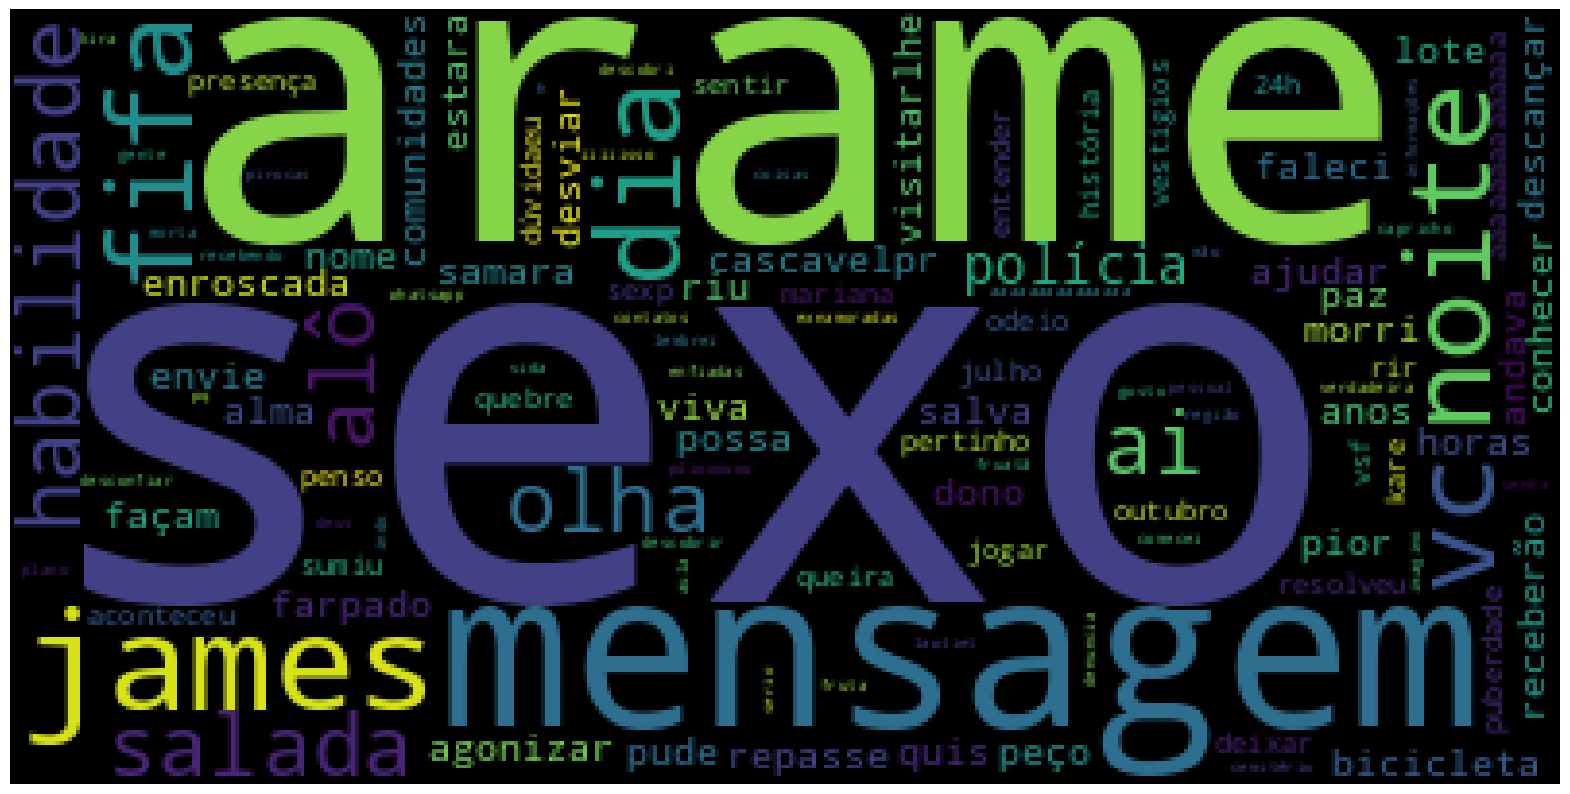

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(banana))